In [2]:
import nltk
from konlpy.tag import Mecab

In [3]:
import sklearn
import pandas as pd

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import tensorflow as tf
fm.findSystemFonts()
plt.rcParams['font.family']= ["DungGeunMo"]
plt.rcParams["axes.unicode_minus"]=False

# **1. 데이터 준비**

## **1-1. 데이터 가져오기**

In [4]:
data = pd.read_csv('C:/Users/User/Desktop/MiniProject_4/spam.csv')

## **1-2. 데이터 확인하기**

In [5]:
data.head()

,text,label
0,[Web발신]박춘규회원님손절주식은그만월급배만드는법http://lco.jp/eA,spam
1,[Web발신]골든브릿지에서손실을보셨나요??http://bitly.kr/bRGtq[FW],spam
2,[Web발신][대//박]가(.원)입코(WN)드MEP.com,spam
3,[Web발신](광고)이정미님아직도주식하시나요http://pf.kakao.com/_u...,spam
4,[Web발신]송승용님사람이모이는곳에는이유가있습니다하루~정보공개is.gd/JsJP,spam


In [6]:
# info() 함수를 이용해서 데이터의 정보를 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20089 non-null  object
 1   label   20100 non-null  object
dtypes: object(2)
memory usage: 314.2+ KB


In [7]:
# freq: 최빈값의 빈도
data.describe()

,text,label
count,20089,20100
unique,18386,2
top,[Web발신]회원님예치금원보유중보관기간끝납니다해저.한국<<안심다운로드코드,spam
freq,107,12817


In [8]:
# label 데이터 분포를 확인합니다.
data.groupby('label').describe()

text                                                      
       count unique                                       top freq
label                                                             
ham     7272   6903    [Web발신](E-pay)결제품명:휘센에어컨금액:당일만원처리예정문의:   10
spam   12817  11485  [Web발신]회원님예치금원보유중보관기간끝납니다해저.한국<<안심다운로드코드  107

In [9]:
data.label.value_counts()

spam    12817
ham      7283
Name: label, dtype: int64

## **1-3. 결측치 제거**

In [10]:
# 결측치를 제거한 후 확인합니다.
data.isna().sum()

text     11
label     0
dtype: int64

In [11]:
data.loc[data['text'].isna()][['text', 'label']]

,text,label
1661,NaN,ham
1980,NaN,ham
3785,NaN,ham
4518,NaN,ham
5408,NaN,ham
11245,NaN,ham
13528,NaN,ham
14163,NaN,ham
15654,NaN,ham
18544,NaN,ham


In [12]:
data = data.dropna()
data.shape

(20089, 2)

In [13]:
# label 데이터 분포를 확인합니다.
data.groupby('label').describe()

text                                                      
       count unique                                       top freq
label                                                             
ham     7272   6903    [Web발신](E-pay)결제품명:휘센에어컨금액:당일만원처리예정문의:   10
spam   12817  11485  [Web발신]회원님예치금원보유중보관기간끝납니다해저.한국<<안심다운로드코드  107

In [14]:
data.label.value_counts()

spam    12817
ham      7272
Name: label, dtype: int64

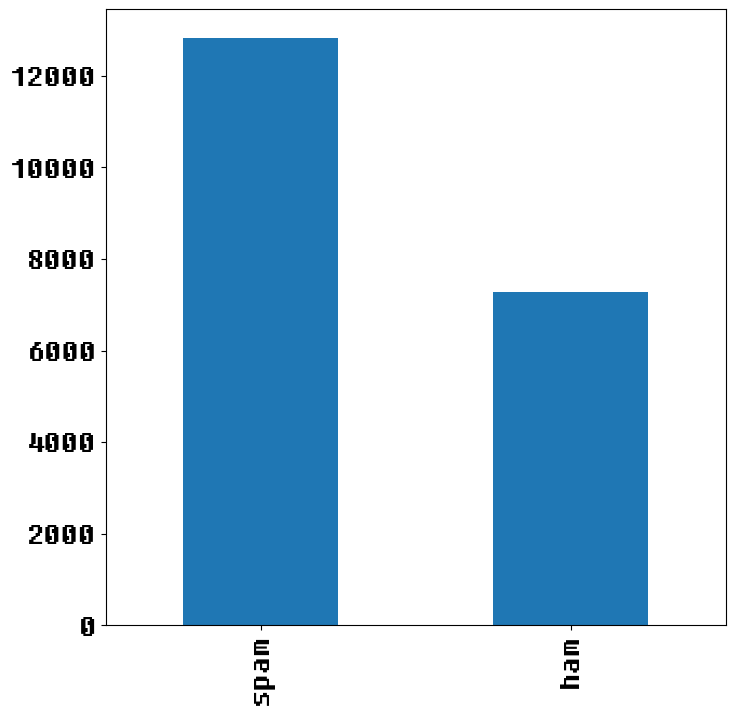

In [15]:
plt.rc('font', size=25)
plt.figure(figsize=(8, 8))
data.label.value_counts().plot.bar()
plt.show()

# **2. 텍스트 데이터 분석**

## **2-1. 텍스트 길이 분포**

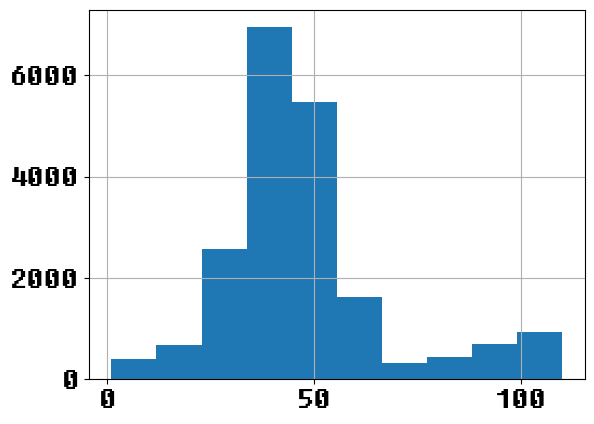

In [16]:
text_len = data['text'].apply(len)
text_len.hist()
plt.show()

In [17]:
text_len.describe()

count    20089.000000
mean        47.395241
std         20.327731
min          1.000000
25%         36.000000
50%         44.000000
75%         52.000000
max        110.000000
Name: text, dtype: float64

In [18]:
tmp = data.copy()
tmp['length'] = text_len

(-40.0, 950.0)

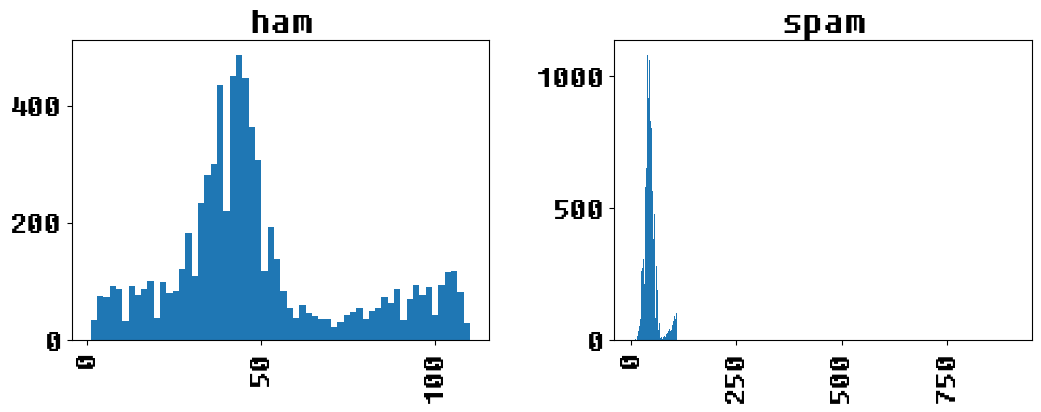

In [19]:
tmp.hist(column='length',by='label',bins=60,figsize=(12,4))
plt.xlim(-40,950)

In [22]:
# konlpy를 활용하여 태깅 클래스를 불러옵니다.
# mecab = Mecab()
# mecab 설치하기